In [1]:
!pip install densitypeakclustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import sklearn.model_selection
from sklearn.cluster import DBSCAN,KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
import geopandas as gpd

In [3]:
import nbformat
print(nbformat.__version__)

5.10.4


In [4]:
path = r'D:\Research_ICNlab\Clustering\Data\countries (1).csv'
data = pd.read_csv(path)
data

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [5]:
import plotly.express as px
px.scatter_mapbox(data, lat = 'latitude', lon = 'longitude', text = 'name',
                  mapbox_style = 'open-street-map', zoom=1, height=600, width=800)

<Axes: xlabel='latitude', ylabel='longitude'>

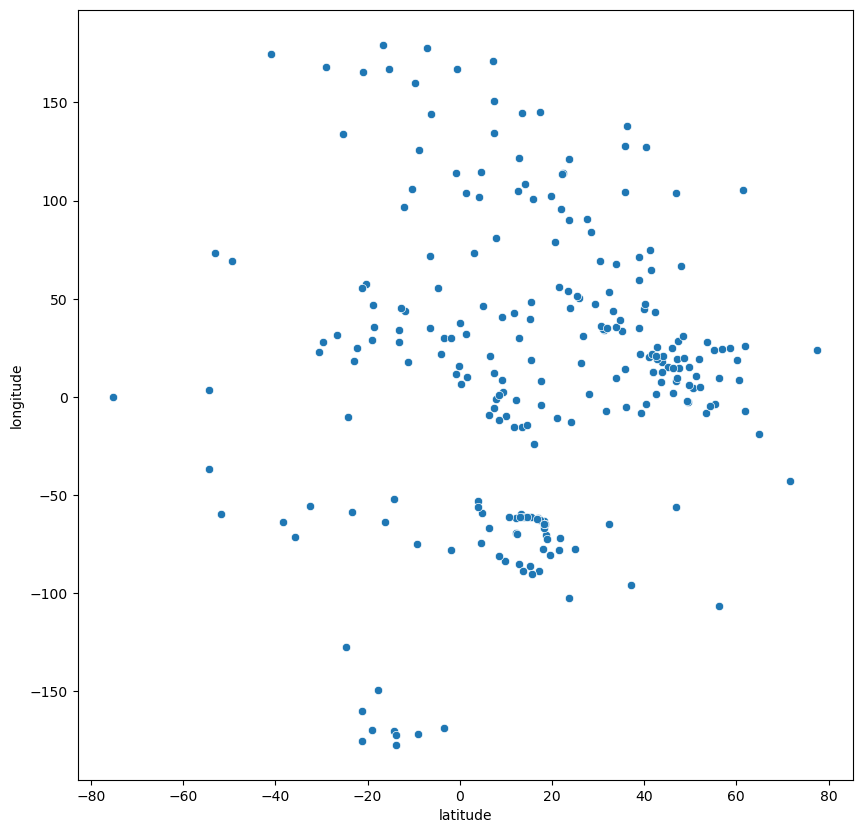

In [6]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = "latitude",y = "longitude",data = data)

In [7]:
data.isna().sum()
data = data.dropna()

x = data.drop(['name','country'],axis = 1)
x

,latitude,longitude
0,42.546245,1.601554
1,23.424076,53.847818
2,33.939110,67.709953
3,17.060816,-61.796428
4,18.220554,-63.068615
...,...,...
240,15.552727,48.516388
241,-12.827500,45.166244
242,-30.559482,22.937506
243,-13.133897,27.849332


**KMEANS**
**bold text**

In [8]:
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    distorsions.append(kmeans.inertia_)

Exception in thread Thread-8 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\nguye\anaconda3\envs\iot\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "c:\Users\nguye\anaconda3\envs\iot\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\nguye\anaconda3\envs\iot\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\nguye\anaconda3\envs\iot\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdd in position 35: invalid continuation byte
c:\Users\nguye\anaconda3\envs\iot\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of 

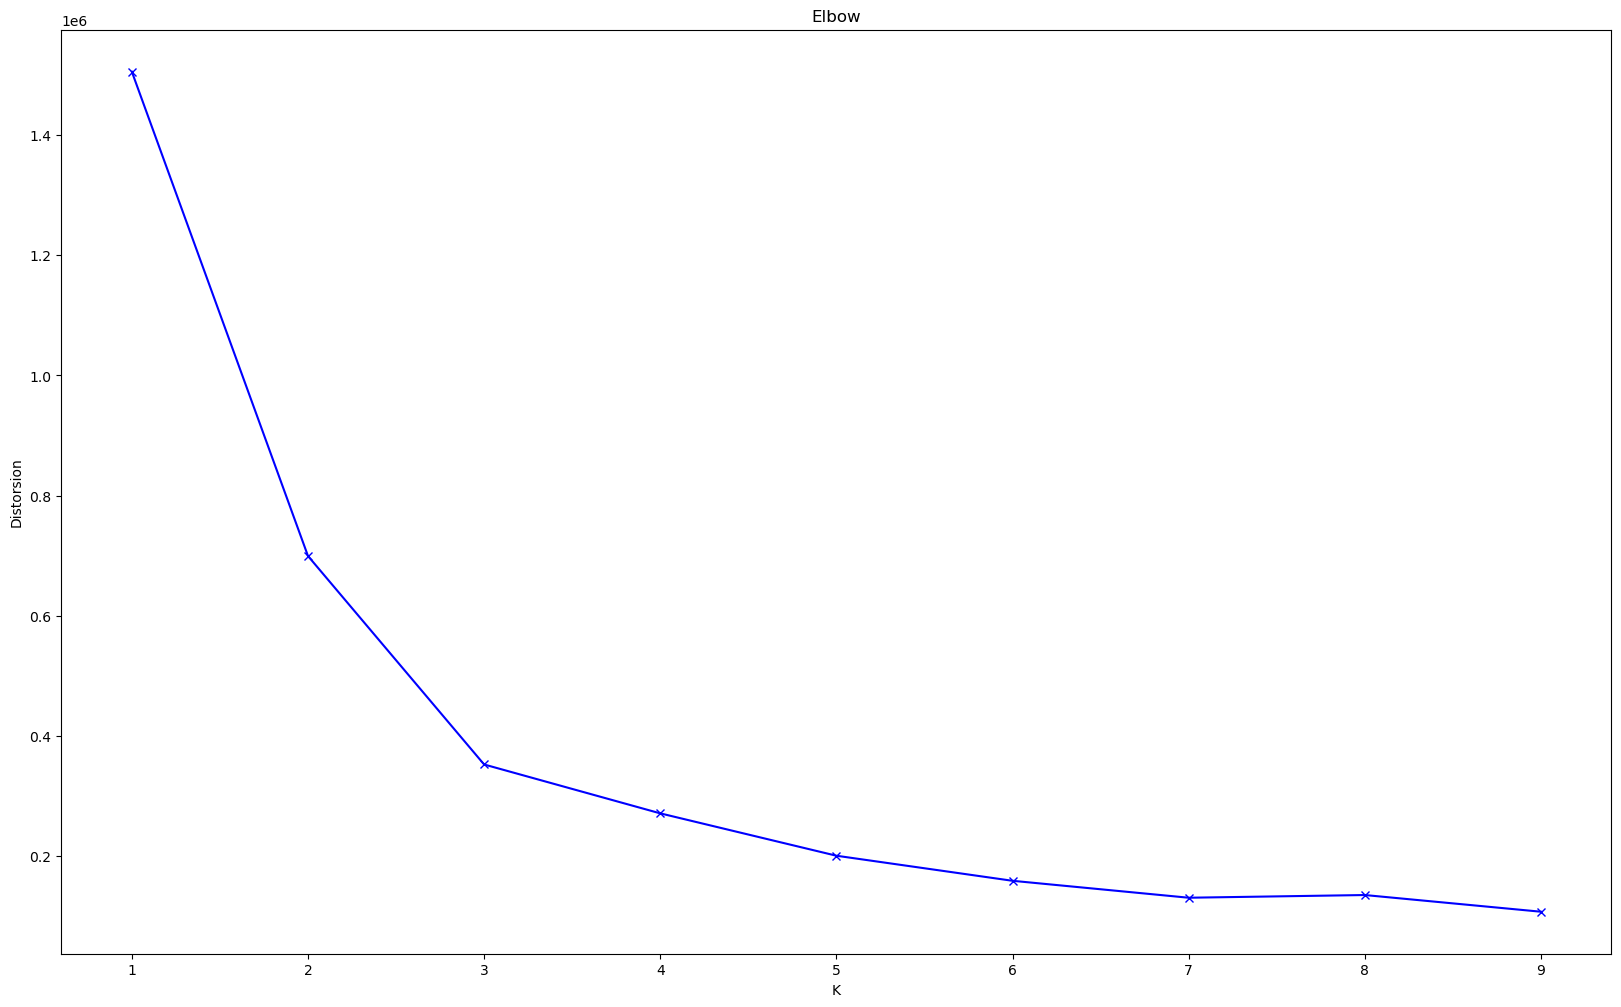

In [9]:
plt.figure(figsize=(20,12))
plt.plot(range(1,10),distorsions,'bx-')
plt.xlabel("K")
plt.ylabel("Distorsion")
plt.title("Elbow")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(x)
y_pred = kmeans.predict(x)
centers=kmeans.cluster_centers_
centers


c:\Users\nguye\anaconda3\envs\iot\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([[ 25.18463382,  21.11609071],
       [  4.58866556, -85.17153469],
       [  6.16733752, 120.63303011]])

In [11]:
x

,latitude,longitude
0,42.546245,1.601554
1,23.424076,53.847818
2,33.939110,67.709953
3,17.060816,-61.796428
4,18.220554,-63.068615
...,...,...
240,15.552727,48.516388
241,-12.827500,45.166244
242,-30.559482,22.937506
243,-13.133897,27.849332


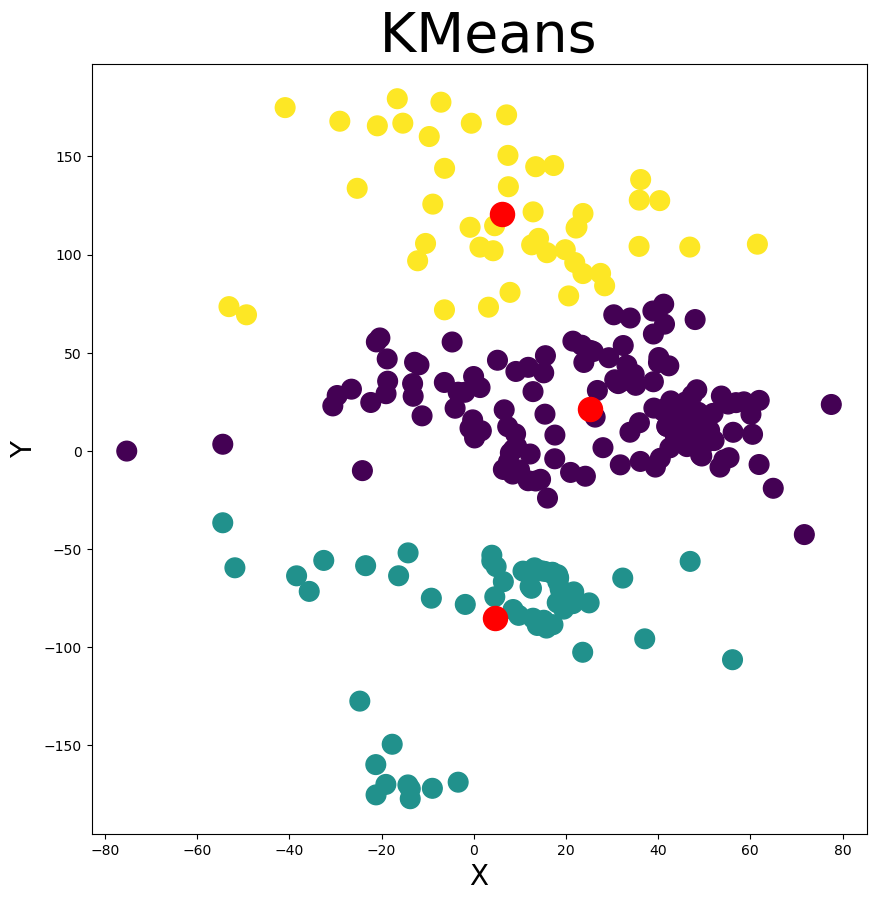

In [12]:
# px.scatter_mapbox(x, lat="latitude", lon="longitude", text="name", 
#                         color="KMeans_Cluster", title="K-Meanss Clustering",mapbox_style="open-street-map",
#                         zoom=1, height=600, width=800)
plt.figure(figsize=(10,10))
plt.scatter( x['latitude'], x['longitude'], c=y_pred, s=200)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.scatter(centers[:,0], centers[:,1],s=300,c = 'red')
plt.title(" KMeans", fontsize=40)
plt.show()

**DBSCAN**

- eps : Nó xác định vùng lân cận xung quanh một điểm dữ liệu, tức là nếu khoảng cách giữa hai điểm nhỏ hơn hoặc bằng 'eps' thì chúng được coi là hàng xóm. Nếu giá trị eps được chọn quá nhỏ thì phần lớn dữ liệu sẽ được coi là ngoại lệ. Nếu nó được chọn rất lớn thì các cụm sẽ hợp nhất và phần lớn các điểm dữ liệu sẽ nằm trong cùng một cụm. Một cách để tìm giá trị eps dựa trên k-distance graph.

- MinPts : Số lân cận tối thiểu (điểm dữ liệu) trong bán kính eps. Tập dữ liệu càng lớn thì phải chọn giá trị MinPts càng lớn. Giá trị tối thiểu của MinPts phải được chọn ít nhất là 3.


- min_samples : Là MinPts nhưng tính điểm ở tâm

Text(0.5, 1.0, 'Sắp xếp Khoảng cách tối đa theo k Nearest Neighbor của kNN')

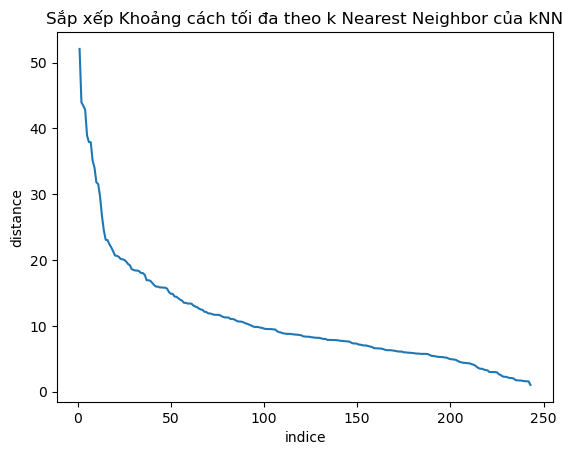

In [13]:
neighbors = 5
knn = NearestNeighbors(n_neighbors=neighbors)
knn.fit(x)
distances, indices = knn.kneighbors(x)
distance_dec = sorted(distances[:,neighbors-1],reverse = True)

plt.plot(list(range(1,len(distance_dec )+1)), distance_dec)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sắp xếp Khoảng cách tối đa theo k Nearest Neighbor của kNN')

**Biểu đồ k-distance**

 - Đây là biểu đồ thể hiện giá trị khoảng cách trong thuật toán k-Means clustering đến k điểm láng giềng gần nhất.

 - Ứng với mỗi điểm chúng ta chỉ lựa chọn ra khoảng cách lớn nhất trong k
 khoảng cách. Những khoảng cách này trên đồ thị được sắp xếp theo thứ tự giảm dần. Các giá trị tốt của epsilon là vị trí mà biểu đồ này cho thấy xuất hiện một điểm khuỷ tay (elbow point):
 
 - Điểm gãy (elbow) là điểm mà tại đó sự tăng trưởng của khoảng cách bắt đầu đột ngột tăng mạnh.

 - Nếu epsilon được chọn quá nhỏ, một phần lớn dữ liệu sẽ không được phân cụm và được xem là nhiễu; trong khi đối với giá trị epsilon quá cao, các cụm sẽ hợp nhất và phần lớn các điểm sẽ nằm trong cùng một cụm.

 - Nói chung, các giá trị nhỏ của epsilon được ưu tiên hơn và theo quy tắc chung, chỉ một phần nhỏ các điểm nên nằm trong vùng lân cận epsilon.

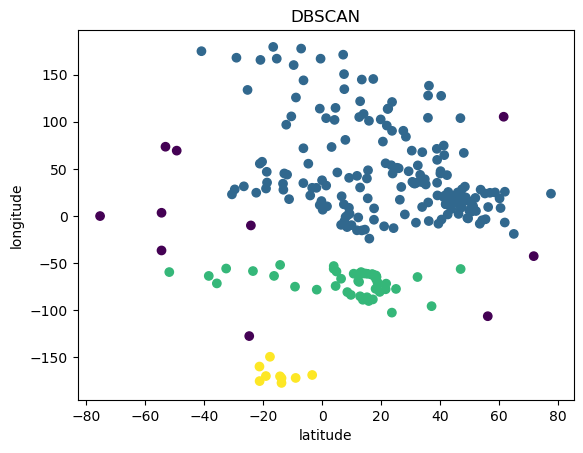

In [14]:
db = DBSCAN(min_samples = 5,eps = 20)
db.fit(x)
y_pred = db.fit_predict(x)

plt.scatter(x['latitude'],x['longitude'],c = y_pred)
plt.title('DBSCAN')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

DENSITY_PEAK_CLUSTERING

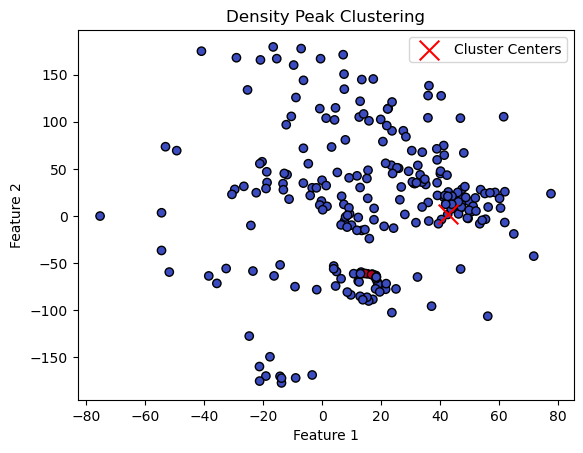

In [15]:
def density_peak_clustering(data, dc, cluster_threshold=0.5):
    # Step 1: Compute the distance matrix
    dist = squareform(pdist(data))

    # Step 2: Calculate the local density for each point
    rho = np.sum(np.exp(-(dist / dc)**2), axis=1)

    # Step 3: Calculate the minimum distance to a point with higher density
    delta = np.zeros(len(data))
    nearest_higher_density = np.zeros(len(data), dtype=int)

    for i in range(len(data)):
        mask = rho > rho[i]
        if np.any(mask):
            delta[i] = np.min(dist[i, mask])
            nearest_higher_density[i] = np.where(mask)[0][np.argmin(dist[i, mask])]
        else:
            delta[i] = np.max(dist[i])
            nearest_higher_density[i] = i

    # Step 4: Identify cluster centers
    gamma = rho * delta
    cluster_centers = np.where(gamma > cluster_threshold * np.max(gamma))[0]

    # Step 5: Assign clusters
    labels = -np.ones(len(data), dtype=int)
    for center in cluster_centers:
        labels[center] = center

    for i in range(len(data)):
        if labels[i] == -1:
            labels[i] = labels[nearest_higher_density[i]]

    return labels, cluster_centers

# Generate synthetic data

# Set the cutoff distance (dc) as a percentage of the maximum distance
dc = np.percentile(squareform(pdist(x)), 2)

# Run Density Peak Clustering
labels, cluster_centers = density_peak_clustering(x, dc)

# Plot results
plt.scatter(x['latitude'], x['longitude'], c=labels, cmap='coolwarm', marker='o', edgecolor='k')
plt.scatter(x.loc[[0],'latitude'], x.loc[[0],'longitude'], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('Density Peak Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

1. Kmeans

- Ưu điểm: Đơn giản, dễ hiểu và triển khai.

- Nhược điểm: Phụ thuộc vào việc chọn K ban đầu, nhạy cảm với các điểm ngoại lai, chỉ phù hợp với các cụm hình tròn và có kích thước tương đương nhau.



2. DBSCAN

- Ưu điểm: Không cần xác định số cụm trước, có thể phát hiện các cụm có hình dạng bất kỳ, không bị ảnh hưởng bởi ngoại lai.

- Nhược điểm: Khó chọn các tham số eps (bán kính lân cận) và min_samples (số điểm tối thiểu trong một cụm).